<a href="https://colab.research.google.com/github/Tauseef-09/TED_Talk_Views_Prediction/blob/main/TED_Talk_Views_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 
# Importing data visualization libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing data manipulation libraries.
import pandas as pd
import numpy as np

# Datatime library for Date columns.
from datetime import datetime
import datetime as dt
from operator import itemgetter

# Importing preprocessing libraries. 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Importing model selection libraries.
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# importing XGB regressor.
from xgboost import XGBRegressor

# Import metrics libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Importing graphviz for visualizing decision trees.
import graphviz
import sklearn.tree as tree

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Mounting drive inorder to get the data set

from google.colab import drive
drive.mount('/content/mount')


Mounted at /content/mount


In [ ]:
# Reading the required data set from drive and storing it in a variable

Ted_df = pd.read_csv('/content/mount/MyDrive/mount_data/data_ted_talks.csv')


In [ ]:
# Copying the data into another varible so that any changes we make wont change the data present in our original data frame.

Ted_data = Ted_df.copy()


---
# Basic Observation on our Data Set 
---

In [ ]:
# Trying to know about the shape of our data set.

print(f'The number of observations in our Data set =', Ted_data.shape[0])
print(f'The number of features in our Data set =', Ted_data.shape[1])


The number of observations in our Data set = 4005
The number of features in our Data set = 19


In [ ]:
# Getting a glance of what kinda data present in our data set.

Ted_data.sample(5) 


,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
3971,61611,Can you solve the sea monster riddle?,Daniel Finkel,{0: 'Daniel Finkel'},NaN,NaN,668529,2020-04-02,2020-04-02,TED-Ed,en,"['ar', 'en', 'es', 'fr', 'he', 'ko', 'pt-br', ...",NaN,295,"['TED-Ed', 'education', 'oceans', 'animation',...",{35897: 'Can you solve the jail break riddle?'...,https://www.ted.com/talks/daniel_finkel_can_yo...,"According to legend, once every thousand years...","According to legend, once every thousand years..."
762,996,7 ways games reward the brain,Tom Chatfield,{0: 'Tom Chatfield'},{0: ['gaming theorist']},"{0: ""Tom Chatfield thinks about games -- what ...",1295108,2010-07-14,2010-11-01,TEDGlobal 2010,en,"['ar', 'bg', 'cs', 'da', 'de', 'el', 'en', 'es...",349.0,988,"['culture', 'education', 'entertainment', 'gam...","{799: 'Gaming can make a better world', 361: '...",https://www.ted.com/talks/tom_chatfield_7_ways...,We're bringing gameplay into more aspects of o...,I love video games. I'm also slightly in awe o...
607,786,"In the Internet age, dance evolves ...",The LXD,{0: 'The LXD'},{0: ['dance adventurers']},{0: 'The LXD (the Legion of Extraordinary Danc...,4000539,2010-02-02,2010-03-05,TED2010,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",237.0,1008,"['collaboration', 'dance', 'entertainment', 'g...","{24: 'A dance of ""Symbiosis""', 2589: 'A visual...",https://www.ted.com/talks/the_lxd_in_the_inter...,The LXD (the Legion of Extraordinary Dancers) ...,(Music) (Applause) I'm Jon M. Chu. And I'm not...
3329,24399,What causes cavities?,Mel Rosenberg,{0: 'Mel Rosenberg'},NaN,NaN,2983258,2016-10-17,2019-03-22,TED-Ed,en,"['ar', 'bg', 'cs', 'de', 'en', 'es', 'fa', 'fr...",NaN,285,"['health', 'public health', 'healthcare', 'TED...","{24190: 'What causes bad breath?', 24370: 'Why...",https://www.ted.com/talks/mel_rosenberg_what_c...,When a team of archeologists recently came acr...,When a team of archaeologists recently came ac...
289,353,How to pitch to a VC,David S. Rose,{0: 'David S. Rose'},{0: ['angel investor']},"{0: '""The Pitch Coach"" David S. Rose is an exp...",1320693,2007-03-01,2008-09-19,TED2007,en,"['ar', 'bg', 'de', 'en', 'es', 'fr', 'he', 'it...",107.0,879,"['business', 'invention', 'investment', 'prese...","{70: '8 secrets of success', 28: 'How to get y...",https://www.ted.com/talks/david_s_rose_how_to_...,Thinking startup? David S. Rose's rapid-fire T...,Good morning. My name is David Rose. I am a se...


In [ ]:

Ted_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [ ]:

round(100*(Ted_data.isnull().sum()/len(Ted_data)), 2).sort_values(ascending=False)


comments          16.35
occupations       13.03
about_speakers    12.56
all_speakers       0.10
recorded_date      0.02
talk_id            0.00
description        0.00
url                0.00
related_talks      0.00
topics             0.00
duration           0.00
event              0.00
available_lang     0.00
native_lang        0.00
title              0.00
published_date     0.00
views              0.00
speaker_1          0.00
transcript         0.00
dtype: float64

* We can clearly see that null values are present in 'all_speakers', 'occupations', 'about_speakers', 'recorded_date' and 'comments' columns.
* Most of the features are of 'object' data type.

---
## Imputing the Null Values
---

In [ ]:
# Loading Necessary classes from sci-kit learn library for imputing Null Values.

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [ ]:
# The 'about_speakers' column seems to look not important for our model training so we are dropping it.

Ted_data.drop(columns = ['about_speakers'], inplace = True)

In [ ]:
# the columns to be treated of null values are stored in a variable.

null_val_col = Ted_data[['all_speakers', 'occupations', 'comments']]

# Different types of imputations needed for the respective columnns are coded.

imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='constant', fill_value = '')
imputer3 = SimpleImputer(strategy='constant', fill_value = str({0:['Other']}))

# Creating Column Transformer Variable and assigning what kinda imputations to be applied on what columns.

trf = ColumnTransformer([
    ('imputing_all_speakers',imputer2,['all_speakers']),
    ('imputing_occupations',imputer3,['occupations']),
    ('imputing_comments',imputer1,['comments'])]
,remainder='passthrough')


In [ ]:
# Fitting (or) Imputing the null values. 

data_transformed = trf.fit_transform(null_val_col)
data_transformed


array([["{0: 'Al Gore'}", "{0: ['climate advocate']}", 272.0],
       ["{0: 'Hans Rosling'}",
        "{0: ['global health expert; data visionary']}", 628.0],
       ["{0: 'David Pogue'}", "{0: ['technology columnist']}", 124.0],
       ...,
       ["{0: 'Dick M. Carpenter II'}", "{0: ['law researcher']}", 9.0],
       ["{0: 'Daina Ramey Berry'}", "{0: ['Other']}", 161.99701492537312],
       ["{0: 'Cella Wright'}", "{0: ['Other']}", 161.99701492537312]],
      dtype=object)

In [ ]:
# Convering the array of null imputed columns into a Data Frame.

data_t_transformed = pd.DataFrame(data_transformed,columns=['all_speakers', 'occupations', 'comments'])

# Dropping the original columns which are not treated of null values.

Ted_data.drop(columns = ['all_speakers', 'occupations', 'comments'], inplace = True)

# Concatinating the columns.

Ted_non_null_df = pd.concat([Ted_data, data_t_transformed], axis=1)


In [ ]:
# As there is only one null value in 'recorded_date' column we can simply drop it.

Ted_non_null_df = Ted_non_null_df.dropna()
Ted_non_null_df.isnull().sum()


talk_id           0
title             0
speaker_1         0
views             0
recorded_date     0
published_date    0
event             0
native_lang       0
available_lang    0
duration          0
topics            0
related_talks     0
url               0
description       0
transcript        0
all_speakers      0
occupations       0
comments          0
dtype: int64

In [ ]:
# comments column has changed to object type lets make it to int again

Ted_non_null_df['comments'] = Ted_non_null_df['comments'].astype('int64')


In [ ]:
Ted_non_null_df.describe().apply(lambda x: x.apply('{0:.2f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
talk_id,4004.00,12421.50,17435.76,1.00,1251.75,2332.50,23774.00,62794.00
views,4004.00,2148223.29,3451629.07,0.00,881760.50,1375593.50,2133174.50,65051954.00
duration,4004.00,723.93,361.79,60.00,392.75,738.00,973.25,3922.00
comments,4004.00,161.87,245.89,0.00,46.00,119.00,162.00,6449.00


* Here we can observe that there are outliers in most of numerical columns [As there is huge difference between 75% and Max Value]

---
## Exploring the columns of type : 'datetime'.
---

In [ ]:
# Finding the no of days it took for a recorded Ted talk to get published.

from datetime import datetime

Ted_date_col = Ted_non_null_df[['recorded_date', 'published_date']]

def days_num(rd, pd):
    
    date_format = "%Y-%m-%d"
    a = datetime.strptime(rd , date_format)
    b = datetime.strptime(pd , date_format)
    delta = b - a
    return delta.days

Ted_non_null_df['No_of_days_to_release'] = Ted_date_col.apply(lambda x: days_num(x['recorded_date'], x['published_date']),axis=1)


In [ ]:
Ted_non_null_df.sample(2)

,talk_id,title,speaker_1,views,recorded_date,published_date,event,native_lang,available_lang,duration,topics,related_talks,url,description,transcript,all_speakers,occupations,comments,No_of_days_to_release
2693,12650,Why we should end animal agriculture,Jacy Reese,131519,2018-02-03,2018-03-14,TEDxUniversityofMississippi,en,"['en', 'it', 'nl']",786,"['global issues', 'science', 'food', 'health',...","{2003: 'Save the oceans, feed the world!', 960...",https://www.ted.com/talks/jacy_reese_why_we_sh...,There are over 100 billion animals in the glob...,"Before we dive in, I want to ask a couple of q...",{0: 'Jacy Reese'},{0: ['Other']},161,39
2642,8788,The surprising solution to ocean plastic,David Katz,1928266,2017-12-06,2018-01-25,TED@IBM,en,"['ar', 'de', 'en', 'es', 'fa', 'fr', 'hu', 'id...",713,"['plastic', 'oceans', 'pollution', 'poverty', ...",{2696: 'This app makes it fun to pick up litte...,https://www.ted.com/talks/david_katz_the_surpr...,Can we solve the problem of ocean plastic poll...,We've had it all wrong. Everybody. We've had i...,{0: 'David Katz'},{0: ['plastics alchemist']},58,50


In [ ]:

Ted_non_null_df.describe().apply(lambda x: x.apply('{0:.2f}'.format)).T


,count,mean,std,min,25%,50%,75%,max
talk_id,4004.00,12421.50,17435.76,1.00,1251.75,2332.50,23774.00,62794.00
views,4004.00,2148223.29,3451629.07,0.00,881760.50,1375593.50,2133174.50,65051954.00
duration,4004.00,723.93,361.79,60.00,392.75,738.00,973.25,3922.00
comments,4004.00,161.87,245.89,0.00,46.00,119.00,162.00,6449.00
No_of_days_to_release,4004.00,307.22,582.36,-578.00,42.00,104.00,229.00,8804.00


* Here the minimum value of 'No_of_days_to_release' can't be negative as the published date will be always ahead of recorded date. So, we have to deal it.

In [ ]:
# Function Which makes the negative values in 'No_of_days_to_release' column to '0'.

def changing_no_of_days(a):
    '''This function converts negitive values to 0 and returns back the same value if it is positive'''
    if a < 0 :
        return 0
    else:
        return a
    
Ted_non_null_df['No_of_days_to_release'] = Ted_non_null_df.apply(lambda x: changing_no_of_days(x['No_of_days_to_release']),axis=1)


In [ ]:

Ted_non_null_df.describe().apply(lambda x: x.apply('{0:.2f}'.format)).T


,count,mean,std,min,25%,50%,75%,max
talk_id,4004.00,12421.50,17435.76,1.00,1251.75,2332.50,23774.00,62794.00
views,4004.00,2148223.29,3451629.07,0.00,881760.50,1375593.50,2133174.50,65051954.00
duration,4004.00,723.93,361.79,60.00,392.75,738.00,973.25,3922.00
comments,4004.00,161.87,245.89,0.00,46.00,119.00,162.00,6449.00
No_of_days_to_release,4004.00,307.94,581.74,0.00,42.00,104.00,229.00,8804.00


In [ ]:
# Converting the column from str to datetime.

Ted_non_null_df['published_date'] = pd.to_datetime(Ted_non_null_df['published_date'])

# Extracting the details in our date column.

Ted_non_null_df['published_date_year'] = Ted_non_null_df['published_date'].dt.year
Ted_non_null_df['published_date_month'] = Ted_non_null_df['published_date'].dt.month_name()
Ted_non_null_df['published_date_month_num'] = Ted_non_null_df['published_date'].dt.month
Ted_non_null_df['published_date_day'] = Ted_non_null_df['published_date'].dt.day
Ted_non_null_df['published_date_day_name'] = Ted_non_null_df['published_date'].dt.day_name()


In [ ]:
Ted_non_null_df.head(2)

,talk_id,title,speaker_1,views,recorded_date,published_date,event,native_lang,available_lang,duration,...,transcript,all_speakers,occupations,comments,No_of_days_to_release,published_date_year,published_date_month,published_date_month_num,published_date_day,published_date_day_name
0,1,Averting the climate crisis,Al Gore,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",977,...,"Thank you so much, Chris. And it's truly a gre...",{0: 'Al Gore'},{0: ['climate advocate']},272,122,2006,June,6,27,Tuesday
1,92,The best stats you've ever seen,Hans Rosling,14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",1190,...,"About 10 years ago, I took on the task to teac...",{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},628,125,2006,June,6,27,Tuesday


In [ ]:
# Creating a column named 'published_date_day_num' with day names of a week.

day_name = {'Monday':0 , 'Tuesday':1 , 'Wednesday':2 , 'Thursday':3 , 'Friday':4 , 'Saturday':5 , 'Sunday':6}
Ted_non_null_df['published_date_day_num'] = Ted_non_null_df['published_date_day_name'].map(day_name)


In [ ]:
Ted_non_null_df.head(2)

,talk_id,title,speaker_1,views,recorded_date,published_date,event,native_lang,available_lang,duration,...,all_speakers,occupations,comments,No_of_days_to_release,published_date_year,published_date_month,published_date_month_num,published_date_day,published_date_day_name,published_date_day_num
0,1,Averting the climate crisis,Al Gore,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",977,...,{0: 'Al Gore'},{0: ['climate advocate']},272,122,2006,June,6,27,Tuesday,1
1,92,The best stats you've ever seen,Hans Rosling,14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",1190,...,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},628,125,2006,June,6,27,Tuesday,1


In [ ]:
Ted_non_null_df.drop(columns = ['recorded_date', 'published_date'], inplace = True)

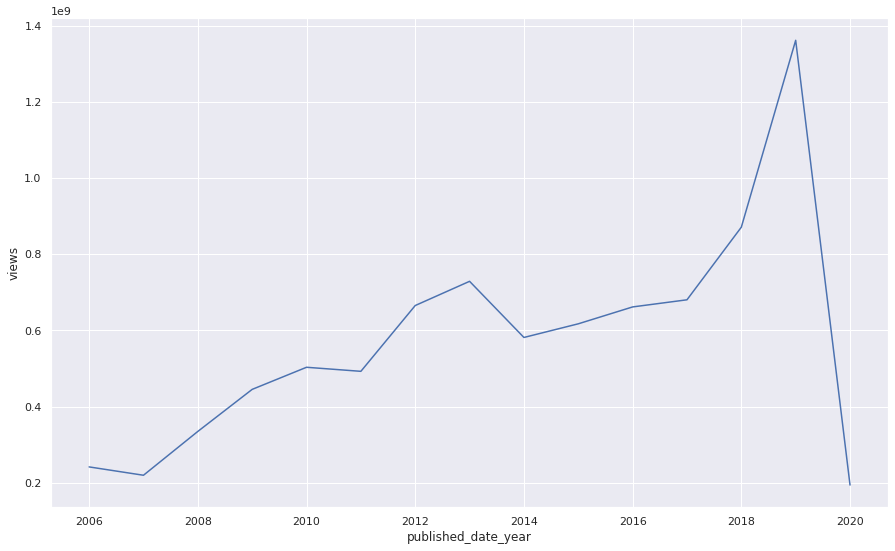

In [ ]:

l_plot_data = Ted_non_null_df.groupby('published_date_year')['views'].sum().reset_index()
sns.set(rc = {'figure.figsize':(15, 9)})
sns.lineplot(l_plot_data['published_date_year'], l_plot_data['views'])


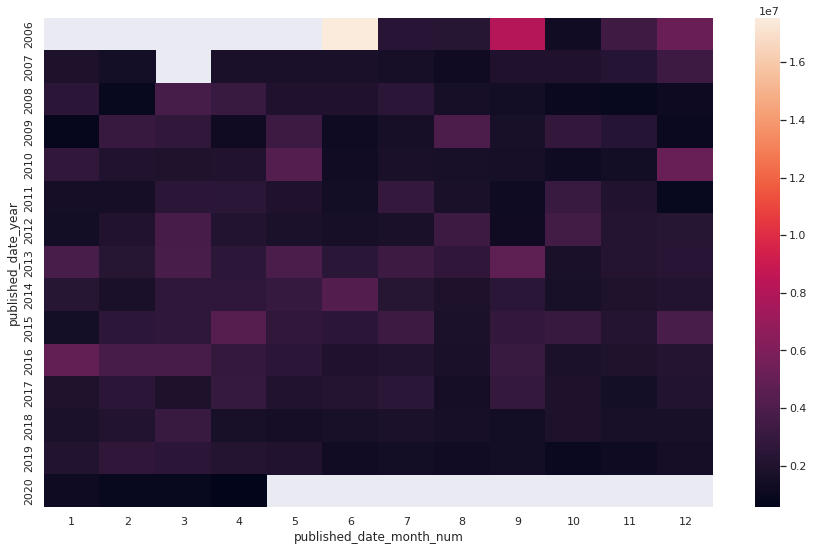

In [ ]:

sns.set(rc = {'figure.figsize':(15, 9)})
sns.heatmap(Ted_non_null_df.pivot_table(values = 'views', index = 'published_date_year', columns = 'published_date_month_num'))


* Here the clear reason behind the sudden drop of views in 2020 is we have data only till April month of 2020.

---
## Exploring the Occupations Column
---

In [ ]:

Ted_non_null_df['occupations'] = Ted_non_null_df.apply(lambda row: eval(row['occupations']), axis=1) 


In [ ]:
# Extracting the occupation from Occupations dictionary.

for index, row in Ted_non_null_df.iterrows():
    occup_list=list(row['occupations'].values())[0][0]
    Ted_non_null_df.loc[index,'occupation'] = str(occup_list)
 

In [ ]:
Ted_non_null_df.sample(2)

,talk_id,title,speaker_1,views,event,native_lang,available_lang,duration,topics,related_talks,...,occupations,comments,No_of_days_to_release,published_date_year,published_date_month,published_date_month_num,published_date_day,published_date_day_name,published_date_day_num,occupation
2920,21039,How I went from child refugee to international...,Halima Aden,1517851,TEDxKakumaCamp,en,"['ar', 'cs', 'de', 'en', 'es', 'fa', 'fr', 'hu...",478,"['global issues', 'fashion', 'refugees', 'TEDx...","{2110: ""Let's help refugees thrive, not just s...",...,{0: ['model']},12,82,2018,August,8,30,Thursday,3,model
2268,2622,Islamophobia killed my brother. Let's end the ...,Suzanne Barakat,1972477,TEDWomen 2016,en,"['ar', 'de', 'el', 'en', 'es', 'eu', 'fa', 'fr...",888,"['activism', 'family', 'community', 'death', '...","{2262: 'What does my headscarf mean to you?', ...",...,{0: ['physician']},146,10,2016,November,11,7,Monday,0,physician


In [ ]:
# Dropping the old occupations column.

Ted_non_null_df.drop(columns = ['occupations'], inplace = True)


---
## Applying Mean Encoding to the columns having high cardinality
---

In [ ]:
# Finding the number of unique types of values present in the following columns.

print(f'The no of Unique columns in speaker_1 column:',Ted_non_null_df['speaker_1'].nunique())
print(f'The no of Unique columns in event column:',Ted_non_null_df['event'].nunique())
print(f'The no of Unique columns in occupation column:',Ted_non_null_df['occupation'].nunique())


The no of Unique columns in speaker_1 column: 3273
The no of Unique columns in event column: 458
The no of Unique columns in occupation column: 1552


* Clearly these columns have high cardinality

In [ ]:
# Applying Mean Encoding 

col_for_me = ['speaker_1', 'event', 'occupation']

for co in col_for_me:
    mean_encoding = Ted_non_null_df.groupby(co)['views'].mean().to_dict()
    Ted_non_null_df[co + '_avg_views']=Ted_non_null_df[co].map(mean_encoding)
   

In [ ]:
Ted_non_null_df.sample(2)

,talk_id,title,speaker_1,views,event,native_lang,available_lang,duration,topics,related_talks,...,published_date_year,published_date_month,published_date_month_num,published_date_day,published_date_day_name,published_date_day_num,occupation,speaker_1_avg_views,event_avg_views,occupation_avg_views
2533,2891,How Africa can use its traditional knowledge t...,Chika Ezeanya-Esiobu,1250828,TEDGlobal 2017,en,"['ar', 'de', 'en', 'es', 'fa', 'fr', 'hu', 'ja...",849,"['agriculture', 'Africa', 'creativity', 'cultu...",{2881: 'Why Africa must become a center of kno...,...,2017,October,10,9,Monday,0,indigenous knowledge expert,1250828.00,1.116784e+06,1250828.00
2,7,Simplicity sells,David Pogue,1920832,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",...,2006,June,6,27,Tuesday,1,technology columnist,2156189.75,3.876291e+06,2156189.75


In [ ]:
# Dropping the old columns.

Ted_non_null_df.drop(columns = ['speaker_1', 'event', 'occupation'], inplace = True)


---
## Exploring 'available_lang' column
---

In [ ]:
# Finding the length of the each observation of 'available_lang' column.

Ted_non_null_df['available_lang'] = Ted_non_null_df.apply(lambda row: eval(row['available_lang']), axis=1)
Ted_non_null_df['num_of_available_lang'] = Ted_non_null_df.apply(lambda x: len(x['available_lang']), axis=1)


In [ ]:
Ted_non_null_df.sample(2)

,talk_id,title,views,native_lang,available_lang,duration,topics,related_talks,url,description,...,published_date_year,published_date_month,published_date_month_num,published_date_day,published_date_day_name,published_date_day_num,speaker_1_avg_views,event_avg_views,occupation_avg_views,num_of_available_lang
3872,52270,How online marketplaces can help local economi...,1274651,en,"[ar, en, ja, ko, nl, pt, pt-br, ro, tr, uk, zh...",747,"['global development', 'business', 'work', 'ec...",{48545: 'The dirty secret of capitalism -- and...,https://www.ted.com/talks/amane_dannouni_how_o...,"The growth of online marketplaces like Uber, A...",...,2020,February,2,11,Tuesday,1,1274651.0,1232052.8,1.274651e+06,12
1354,1638,What we learned from teetering on the fiscal c...,813058,en,"[ar, bg, de, el, en, es, fr, he, hu, it, ja, k...",1188,"['economics', 'global issues', 'politics']","{525: 'How ideas trump crises', 1119: 'The ant...",https://www.ted.com/talks/adam_davidson_what_w...,"At the end of 2012, the US political system wa...",...,2012,December,12,20,Thursday,3,813058.0,1079231.0,2.261175e+06,20


In [ ]:
# Dropping the old column

Ted_non_null_df.drop(columns = ['available_lang'], inplace = True)


---
## Exploring 'topics' column
---

In [ ]:
# Finding the length of the no of topics in each observation of 'topics' column.

Ted_non_null_df['topics'] = Ted_non_null_df.apply(lambda row: eval(row['topics']), axis=1) 
Ted_non_null_df['num_of_topics'] = Ted_non_null_df.apply(lambda x: len(x['topics']), axis=1)


In [ ]:
Ted_non_null_df.sample(2)

,talk_id,title,views,native_lang,duration,topics,related_talks,url,description,transcript,...,published_date_month,published_date_month_num,published_date_day,published_date_day_name,published_date_day_num,speaker_1_avg_views,event_avg_views,occupation_avg_views,num_of_available_lang,num_of_topics
1432,1718,Txtng is killing language. JK!!!,2873417,en,828,"[culture, language, sociology, technology]","{161: 'The joy of lexicography', 164: 'What ou...",https://www.ted.com/talks/john_mcwhorter_txtng...,Does texting mean the death of good writing sk...,We always hear that texting is a scourge. The ...,...,April,4,22,Monday,0,2627587.75,3.012900e+06,2555674.4,32,4
365,437,Genomics 101,456698,en,1286,"[biology, entrepreneur, food, genetics, scienc...",{227: 'On the verge of creating synthetic life...,https://www.ted.com/talks/barry_schuler_genomi...,What is genomics? How will it affect our lives...,"What's happening in genomics, and how this rev...",...,January,1,22,Thursday,3,456698.00,1.242964e+06,2020640.0,21,6


In [ ]:
# Dropping the old column

Ted_non_null_df.drop(columns = ['topics'], inplace = True)


---
# EDA on columns

## Exploring 'title' column 

## Exploring 'native_lang' column 

## Exploring 'related_talks' column 

In [ ]:
# Dropping the unnecessary columns in our Data set.

Ted_non_null_df.drop(columns = ['talk_id', 'title', 'native_lang', 'related_talks', 'url', 'description', 'transcript', 'all_speakers'], inplace = True)


In [ ]:
Ted_non_null_df.head(2)

,views,duration,comments,No_of_days_to_release,published_date_year,published_date_month,published_date_month_num,published_date_day,published_date_day_name,published_date_day_num,speaker_1_avg_views,event_avg_views,occupation_avg_views,num_of_available_lang,num_of_topics
0,3523392,977,272,122,2006,June,6,27,Tuesday,1,2190599.25,3.876291e+06,1879936.5,43,9
1,14501685,1190,628,125,2006,June,6,27,Tuesday,1,3987156.10,3.876291e+06,3987156.1,49,11


In [ ]:

Ted_non_null_df.describe().apply(lambda x: x.apply('{0:.2f}'.format)).T


,count,mean,std,min,25%,50%,75%,max
views,4004.00,2148223.29,3451629.07,0.00,881760.50,1375593.50,2133174.50,65051954.00
duration,4004.00,723.93,361.79,60.00,392.75,738.00,973.25,3922.00
comments,4004.00,161.87,245.89,0.00,46.00,119.00,162.00,6449.00
No_of_days_to_release,4004.00,307.94,581.74,0.00,42.00,104.00,229.00,8804.00
published_date_year,4004.00,2014.60,3.99,2006.00,2011.00,2015.00,2018.00,2020.00
published_date_month_num,4004.00,6.13,3.47,1.00,3.00,6.00,9.00,12.00
published_date_day,4004.00,15.21,8.61,1.00,8.00,15.00,22.00,31.00
published_date_day_num,4004.00,2.11,1.50,0.00,1.00,2.00,3.00,6.00
speaker_1_avg_views,4004.00,2148223.29,3054227.10,0.00,940637.75,1432610.50,2216223.50,57074270.00
event_avg_views,4004.00,2148223.29,1427572.78,15700.00,1614619.97,2059996.01,2480349.49,49730580.00


---
## Dealing with Outliers
---

In [ ]:
col_to_do = ['views', 'duration', 'comments', 'No_of_days_to_release', 'speaker_1_avg_views', 'event_avg_views', 'occupation_avg_views', 'num_of_available_lang', 'num_of_topics']

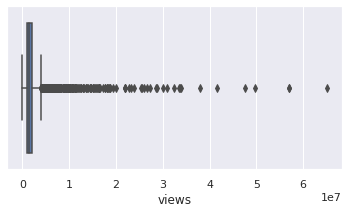

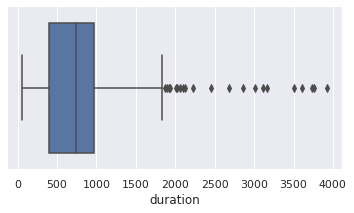

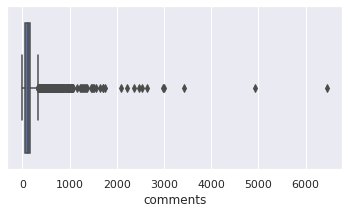

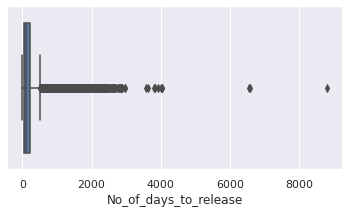

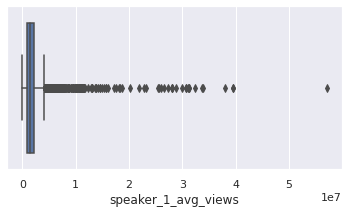

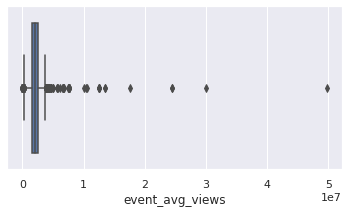

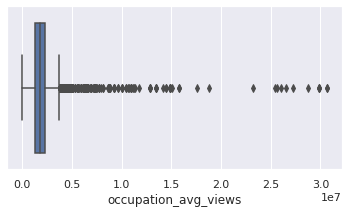

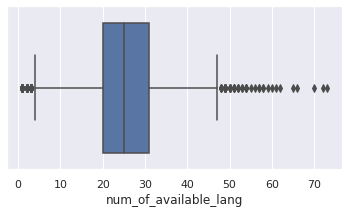

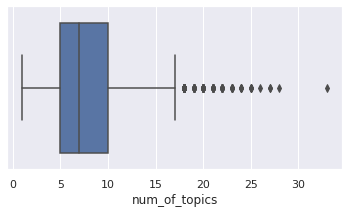

In [ ]:
for co in col_to_do:
    
    plt.figure(figsize=(6,3))
    sns.boxplot(Ted_non_null_df[co])
    plt.show()

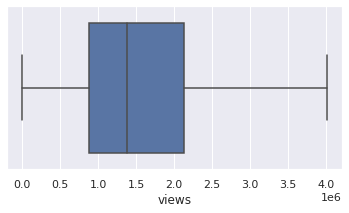

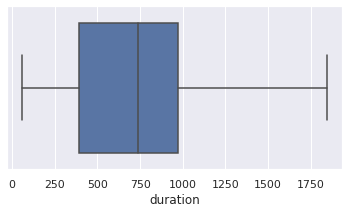

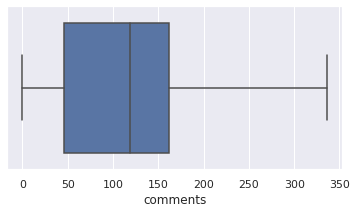

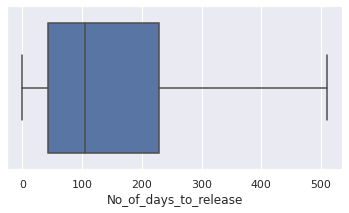

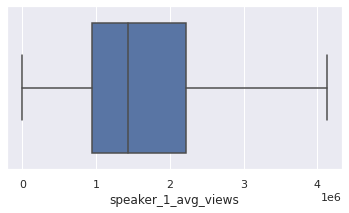

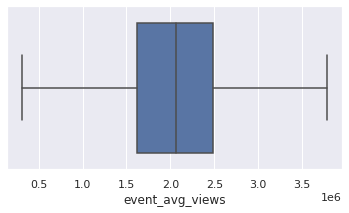

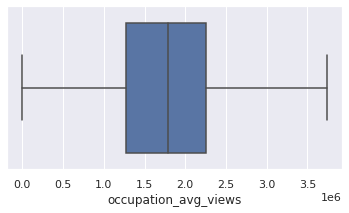

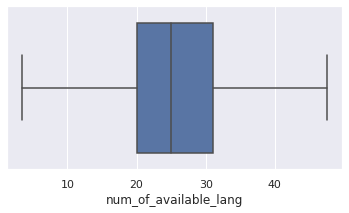

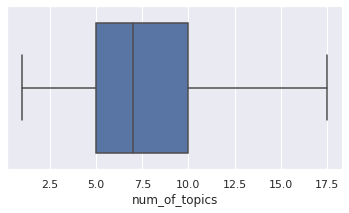

In [ ]:
for co in col_to_do:
    
    percentile25 = Ted_non_null_df[co].quantile(0.25)
    percentile75 = Ted_non_null_df[co].quantile(0.75)

    iqr = percentile75 - percentile25

    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    Ted_non_null_df[co] = np.where(
        Ted_non_null_df[co] > upper_limit,
        upper_limit,
        np.where(
            Ted_non_null_df[co] < lower_limit,
            lower_limit,
            Ted_non_null_df[co]
        )
    )

    plt.figure(figsize=(6,3))
    sns.boxplot(Ted_non_null_df[co])
    plt.show()

In [ ]:
Ted_non_null_df.sample(5)

,views,duration,comments,No_of_days_to_release,published_date_year,published_date_month,published_date_month_num,published_date_day,published_date_day_name,published_date_day_num,speaker_1_avg_views,event_avg_views,occupation_avg_views,num_of_available_lang,num_of_topics
3915,1074082.0,272.0,161.0,509.5,2020,February,2,28,Friday,4,1074082.000,2.059996e+06,2.074486e+06,21.0,7.0
3727,1614148.0,991.0,24.0,173.0,2019,November,11,12,Tuesday,1,1614148.000,2.905740e+06,1.614148e+06,9.0,12.0
3449,1444428.0,196.0,161.0,0.0,2019,April,4,25,Thursday,3,1445220.000,2.059996e+06,2.074486e+06,16.0,5.0
2981,4010295.5,709.0,78.0,181.0,2018,October,10,8,Monday,0,4129602.125,2.045275e+06,3.739066e+06,22.0,6.0
2611,1073074.0,497.0,22.0,114.0,2017,December,12,19,Tuesday,1,1073074.000,1.116784e+06,1.073074e+06,20.0,5.0


In [ ]:
Ted_non_null_df.drop(columns = ['published_date_month_num', 'published_date_day', 'published_date_day_num'], inplace = True)

---
## Applying One-Hot-Encoding on string categorical columns
---

In [ ]:

y = Ted_non_null_df['views']
X = Ted_non_null_df.drop(columns='views')


In [ ]:

X = pd.get_dummies(X, drop_first= True)
X.shape


(4004, 26)

In [ ]:
X.sample(5)

,duration,comments,No_of_days_to_release,published_date_year,speaker_1_avg_views,event_avg_views,occupation_avg_views,num_of_available_lang,num_of_topics,published_date_month_August,...,published_date_month_May,published_date_month_November,published_date_month_October,published_date_month_September,published_date_day_name_Monday,published_date_day_name_Saturday,published_date_day_name_Sunday,published_date_day_name_Thursday,published_date_day_name_Tuesday,published_date_day_name_Wednesday
1067,563.0,112.0,62.0,2012,1539023.0,1.332935e+06,1.807321e+06,36.0,8.0,0,...,0,0,0,0,0,0,0,0,0,1
3741,406.0,16.0,191.0,2019,1526169.0,1.648645e+06,1.526169e+06,29.0,7.0,0,...,0,1,0,0,0,0,0,1,0,0
3038,833.0,35.0,280.0,2018,1687937.0,1.687937e+06,1.484934e+06,16.0,7.0,0,...,0,1,0,0,0,0,0,1,0,0
1053,522.0,173.0,67.0,2012,1835229.2,9.580604e+05,3.578280e+06,40.0,6.0,0,...,0,0,0,0,0,0,0,0,1,0
2538,1318.0,141.0,23.0,2017,3598281.5,2.206106e+06,3.739066e+06,25.0,12.0,0,...,0,0,1,0,0,0,0,0,0,0


---
# Feature Selection
---

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

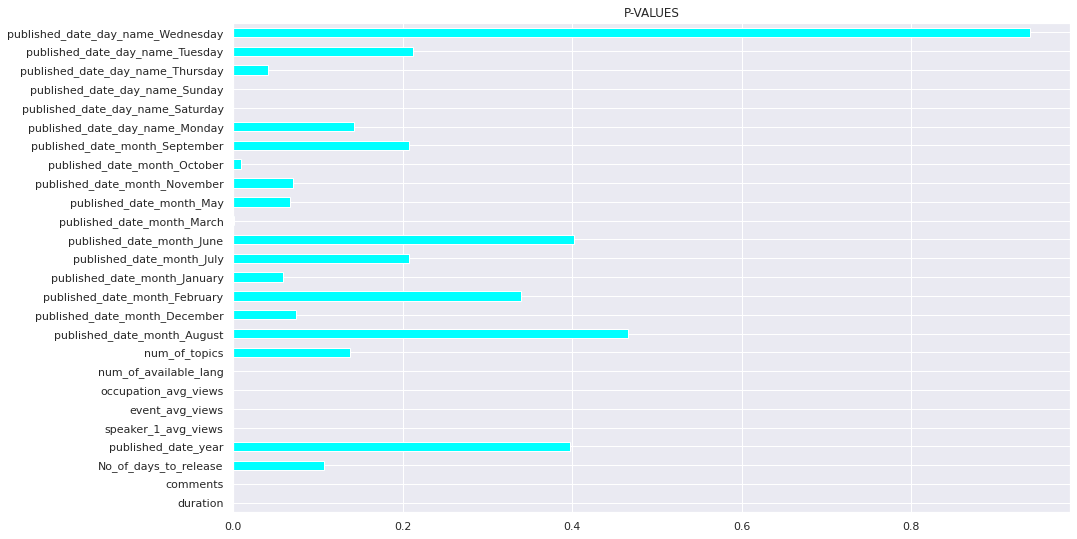

In [ ]:
f_scores = f_regression(X, y)
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='barh',color='aqua',figsize=(15,9))
plt.title('P-VALUES')
plt.show()

In [ ]:

selected_features = np.where(p_values<0.005)[0]
X=X.iloc[0:,selected_features]


---
## Checking for Multicollinearity between features

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
# Function to caluclate VIF values of features.

def vif_calc(X):
    
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
    return(vif)


In [ ]:
vif_calc(X)

,variables,VIF
0,duration,4.291308
1,comments,3.933046
2,speaker_1_avg_views,6.344266
3,event_avg_views,9.088316
4,occupation_avg_views,8.249010
5,num_of_available_lang,10.476311
6,published_date_month_March,1.114580
7,published_date_day_name_Saturday,1.021061
8,published_date_day_name_Sunday,1.030508


In [ ]:
X.drop('num_of_available_lang',axis=1,inplace=True)

In [ ]:
vif_calc(X)

,variables,VIF
0,duration,4.236098
1,comments,3.491131
2,speaker_1_avg_views,6.244480
3,event_avg_views,6.477145
4,occupation_avg_views,8.059491
5,published_date_month_March,1.114383
6,published_date_day_name_Saturday,1.019134
7,published_date_day_name_Sunday,1.029632


In [ ]:
X.drop('occupation_avg_views',axis=1,inplace=True)

In [ ]:
vif_calc(X)

,variables,VIF
0,duration,4.007279
1,comments,3.433229
2,speaker_1_avg_views,4.303910
3,event_avg_views,5.980209
4,published_date_month_March,1.113024
5,published_date_day_name_Saturday,1.019085
6,published_date_day_name_Sunday,1.029380


# MODELS IMPLEMENTATION

---
# Linear Regression
---

In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

In [ ]:
# Fitting the model.

reg = LinearRegression().fit(X_train, y_train)

# Predicting the values for train and test data.
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
LR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , LR_Train_MAE)
LR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , LR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
LR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , LR_Train_MSE)
LR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , LR_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
LR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , LR_Train_RMSE)
LR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , LR_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
LR_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , LR_Train_R2)
LR_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , LR_Test_R2)

# Adjusted R2 of Training and Testing Data.
LR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", LR_Adjusted_R2)


Train Data MAE : 269752.95104541804
Test Data MAE : 253960.9399046614
Train Data MSE : 241727287163.64017
Test Data MSE : 204723896792.73013
Train Data RMSE: 491657.6930788739
Test Data RMSE: 452464.24918741384
R2 : 0.8019581669038164
R2 : 0.8301124981970256
Adjusted R2 :  0.8291165078179462


---
# Lasso Regularization
---

In [ ]:

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
parameters = {'alpha': [ 1e-24, 1e-21, 1e-18, 1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,110,120,150,160,170,200]}
lasso = Lasso()
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-24, 1e-21, 1e-18, 1e-15, 1e-13, 1e-10,
                                   1e-08, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30, 40, 45, 50, 55, 60, 100, 110,
                                   120, 150, 160, 170, 200]},
             scoring='neg_mean_squared_error')

In [ ]:

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)
     

The best fit alpha value is found out to be : {'alpha': 1e-13}

Using  {'alpha': 1e-13}  the negative mean squared error is:  -243681084237.1347


In [ ]:
# Fitting the model.

lasso  = Lasso(alpha=1e-13 , max_iter= 3000)
lasso.fit(X_train, y_train)

# Predicting the values for train and test data.
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
LA_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , LA_Train_MAE)
LA_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , LA_Test_MAE)

# Mean Squared Error of Training and Testing Data.
LA_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , LA_Train_MSE)
LA_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , LA_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
LA_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , LA_Train_RMSE)
LA_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , LA_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
LA_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , LA_Train_R2)
LA_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , LA_Test_R2)

# Adjusted R2 of Training and Testing Data.
LA_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", LA_Adjusted_R2)


Train Data MAE : 269752.95104541804
Test Data MAE : 253960.9399046614
Train Data MSE : 241727287163.64017
Test Data MSE : 204723896792.73013
Train Data RMSE: 491657.6930788739
Test Data RMSE: 452464.24918741384
R2 : 0.8019581669038164
R2 : 0.8301124981970256
Adjusted R2 :  0.8291165078179462


---
# Ridge Regularization
---

In [ ]:
from sklearn.linear_model import Ridge
RI = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100, 5000]}
R_R = GridSearchCV(RI, parameters, cv=5)
R_R.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 5000]})

In [ ]:
print(R_R.best_params_)

{'alpha': 5000}


In [ ]:
# Predicting the values for train and test data.
y_train_pred = R_R.predict(X_train)
y_test_pred = R_R.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
RR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , RR_Train_MAE)
RR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , RR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
RR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , RR_Train_MSE)
RR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , RR_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
RR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , RR_Train_RMSE)
RR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , RR_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
RR_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , RR_Train_R2)
RR_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , RR_Test_R2)

# Adjusted R2 of Training and Testing Data.
RR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", RR_Adjusted_R2)


Train Data MAE : 269299.57801755075
Test Data MAE : 253951.5150508975
Train Data MSE : 242101043315.0592
Test Data MSE : 205743961532.166
Train Data RMSE: 492037.6442052571
Test Data RMSE: 453590.0809455229
R2 : 0.8016519567352147
R2 : 0.8292660105471958
Adjusted R2 :  0.8282650575102029


---
# Elastic Net Regularization
---

In [ ]:

from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,110,120,150],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 110, 120, 150],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [ ]:

print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)


The best fit alpha value is found out to be : {'alpha': 100, 'l1_ratio': 0.3}

Using  {'alpha': 100, 'l1_ratio': 0.3}  the negative mean squared error is:  -243334399227.13428


In [ ]:
# Predicting the values for train and test data.
y_train_pred = elastic_regressor.predict(X_train)
y_test_pred = elastic_regressor.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
ER_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , ER_Train_MAE)
ER_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , ER_Test_MAE)

# Mean Squared Error of Training and Testing Data.
ER_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , ER_Train_MSE)
ER_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , ER_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
ER_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , ER_Train_RMSE)
ER_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , ER_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
ER_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , ER_Train_R2)
ER_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , ER_Test_R2)

# Adjusted R2 of Training and Testing Data.
ER_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", ER_Adjusted_R2)


Train Data MAE : 269231.9476119404
Test Data MAE : 253899.85529762367
Train Data MSE : 242113183686.40677
Test Data MSE : 205778301309.6862
Train Data RMSE: 492049.98088243714
Test Data RMSE: 453627.93268237595
R2 : 0.8016420103968251
R2 : 0.8292375141229544
Adjusted R2 :  0.8282363940214977


---
# Decision Tree Regression 
---

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],'criterion':['mse','mae']}
CV = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid, cv=5)
CV.fit(X_train,y_train)
CV.best_params_

{'criterion': 'mse', 'max_depth': 5}

In [ ]:
# Fitting the model.

DTR = DecisionTreeRegressor(criterion = 'mse', max_depth=4)
DTR.fit(X_train,y_train)

# Predicting the values for train and test data.
y_train_pred = DTR.predict(X_train)
y_test_pred = DTR.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
DTR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , DTR_Train_MAE)
DTR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , DTR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
DTR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , DTR_Train_MSE)
DTR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , DTR_Test_MSE)

# Root Mean Squared error of test data.
DTR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , DTR_Train_RMSE)
DTR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE :" , DTR_Test_RMSE)

# Coefficient of determination of test data.
DTR_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , DTR_Train_R2)
DTR_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , DTR_Test_R2)

# Adjusted R2 of test data.
DTR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", DTR_Adjusted_R2)


Train Data MAE : 250880.5491515649
Test Data MAE : 250674.39799746612
Train Data MSE : 211519337118.7256
Test Data MSE : 219410679445.0487
Train Data RMSE: 459912.31459782156
Test Data RMSE : 468412.93688907515
R2 : 0.8267068738916334
R2 : 0.8179248598537998
Adjusted R2 :  0.8168574176586378


---
# Random Forest Regressor 
---

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RFR = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [ ]:
RFR.fit(X_train, y_train)
y_train_pred = RFR.predict(X_train)
y_test_pred = RFR.predict(X_test)

In [ ]:
# Mean Absolute Error of Training and Testing Data.
RFR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , RFR_Train_MAE)
RFR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , RFR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
RFR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , RFR_Train_MSE)
RFR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , RFR_Test_MSE)

# Root Mean Squared error of test data.
RFR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , RFR_Train_RMSE)
RFR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE :" , RFR_Test_RMSE)

# Coefficient of determination of test data.
RFR_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , RFR_Train_R2)
RFR_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , RFR_Test_R2)

# Adjusted R2 of test data.
RFR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", RFR_Adjusted_R2)


Train Data MAE : 102541.84528907923
Test Data MAE : 223349.83035773708
Train Data MSE : 51253127220.25843
Test Data MSE : 214789355616.22217
Train Data RMSE: 226391.53522218633
Test Data RMSE : 463453.725431377
R2 : 0.9580094436763338
R2 : 0.8217598062015472
Adjusted R2 :  0.8207148469414223


* Hyperparametric Tuning

In [ ]:
RFR_H = RandomForestRegressor(criterion='mae')
grid_values = {'n_estimators':[50, 60, 70, 80, 90, 100 ], 'max_depth':[ 3, 4, 5, 6, 7, ]}
RFR_H_grid = GridSearchCV(RFR_H, param_grid = grid_values, cv=3, n_jobs=-1)

# Fit the object to train dataset
RFR_H_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(criterion='mae'), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [50, 60, 70, 80, 90, 100]})

In [ ]:
RFR_H_grid_optimal_model = RFR_H_grid.best_estimator_

In [ ]:
y_train_pred =  RFR_H_grid_optimal_model.predict(X_train)
y_test_pred  = RFR_H_grid_optimal_model.predict(X_test)

In [ ]:
# Mean Absolute Error of Training and Testing Data.
RFR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , RFR_Train_MAE)
RFR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , RFR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
RFR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , RFR_Train_MSE)
RFR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , RFR_Test_MSE)

# Root Mean Squared error of test data.
RFR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , RFR_Train_RMSE)
RFR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE :" , RFR_Test_RMSE)

# Coefficient of determination of test data.
RFR_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , RFR_Train_R2)
RFR_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , RFR_Test_R2)

# Adjusted R2 of test data.
RFR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", RFR_Adjusted_R2)


Train Data MAE : 168247.9703030998
Test Data MAE : 176522.68071963397
Train Data MSE : 176470442048.45337
Test Data MSE : 196908064174.25073
Train Data RMSE: 420083.8512112235
Test Data RMSE : 443743.24127162853
R2 : 0.8554216603319975
R2 : 0.8365983667197804
Adjusted R2 :  0.8356404006955245


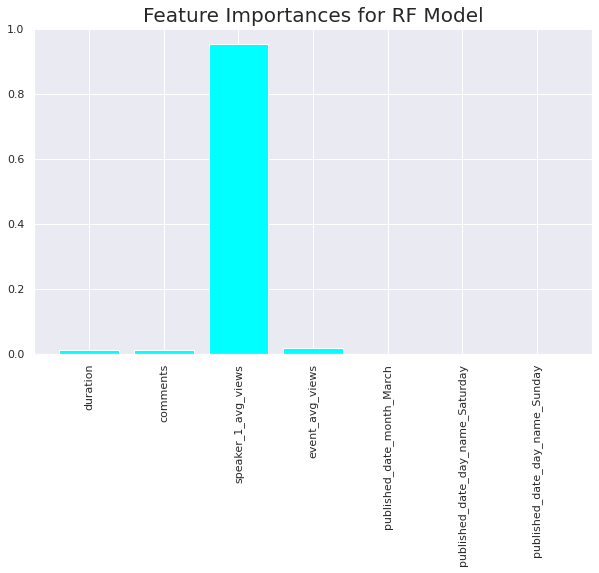

In [ ]:
# getting features according to their importance in prediction

features = X_train.columns
importances = RFR_H_grid.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.bar(x=features, height=importances, color='aqua')
plt.title('Feature Importances for RF Model', size=20)
plt.xticks(rotation='vertical')
plt.show()

---
# Ada Boost Regressor 
---

In [ ]:

from sklearn.ensemble import AdaBoostRegressor

grid = dict()
grid['n_estimators'] = [1, 5, 10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# grid['algorithm'] = ['SAMME', 'SAMME.R']


grid_search = GridSearchCV(estimator=AdaBoostRegressor(), param_grid=grid, n_jobs=-1, cv=5)
grid_result = grid_search.fit(X_train , y_train)
print(grid_result.best_params_)


{'learning_rate': 0.1, 'n_estimators': 5}


In [ ]:

# Predicting the values for train and test data.
y_train_pred = grid_result.predict(X_train)
y_test_pred = grid_result.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
AB_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , AB_Train_MAE)
AB_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , AB_Test_MAE)

# Mean Squared Error of Training and Testing Data.
AB_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , AB_Train_MSE)
AB_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , AB_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
AB_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , AB_Train_RMSE)
AB_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , AB_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
AB_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , AB_Train_R2)
AB_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , AB_Test_R2)

# Adjusted R2 of Training and Testing Data.
AB_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", AB_Adjusted_R2)


Train Data MAE : 284877.95449717256
Test Data MAE : 284347.94631075184
Train Data MSE : 234258786339.78043
Test Data MSE : 240002826281.12064
Train Data RMSE: 484002.8784416271
Test Data RMSE: 489900.83310923306
R2 : 0.8080769448497926
R2 : 0.8008367307318629
Adjusted R2 :  0.799669106875182


---
# Gradient Boost Regressor 
---

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

grid = dict()
grid['n_estimators'] = [1, 3, 5, 10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0, 100]
grid['max_depth'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


grid_search_gb = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid=grid, n_jobs=-1, cv=5)
grid_result = grid_search_gb.fit(X_train , y_train)
print(grid_result.best_params_)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}


In [ ]:

# Predicting the values for train and test data.
y_train_pred = grid_result.predict(X_train)
y_test_pred = grid_result.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
GB_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , GB_Train_MAE)
GB_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , GB_Test_MAE)

# Mean Squared Error of Training and Testing Data.
GB_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , GB_Train_MSE)
GB_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , GB_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
GB_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , GB_Train_RMSE)
GB_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , GB_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
GB_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , GB_Train_R2)
GB_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , GB_Test_R2)

# Adjusted R2 of Training and Testing Data.
GB_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", GB_Adjusted_R2)


Train Data MAE : 206282.5133957873
Test Data MAE : 210095.72249565815
Train Data MSE : 171943672346.92993
Test Data MSE : 183169969369.09143
Train Data RMSE: 414660.91248986794
Test Data RMSE: 427983.60876217147
R2 : 0.8591303428734397
R2 : 0.847998748612393
Adjusted R2 :  0.8471076189978928


---
# XG Boost Regressor 
---

In [ ]:

from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.1)
grid_values = {'n_estimators':[10, 30, 50, 80, 100], 'max_depth':[1, 3, 5, 7, 9]}
xgb_random = RandomizedSearchCV(xgb, param_distributions = grid_values, cv=3)

# Fit the object to train dataset
xgb_random.fit(X_train, y_train)


[10:33:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(cv=3, estimator=XGBRegressor(),
                   param_distributions={'max_depth': [1, 3, 5, 7, 9],
                                        'n_estimators': [10, 30, 50, 80, 100]})

In [ ]:

# finding the optimal model w.r.t. best_estimator_
xgb_optimal_model = xgb_random.best_estimator_
xgb_optimal_model


XGBRegressor()

In [ ]:
# Predicting the values for train and test data.

y_train_pred =  xgb_optimal_model.predict(X_train)
y_test_pred  = xgb_optimal_model.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
XG_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , XG_Train_MAE)
XG_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , XG_Test_MAE)

# Mean Squared Error of Training and Testing Data.
XG_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , XG_Train_MSE)
XG_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , XG_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
XG_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , XG_Train_RMSE)
XG_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , XG_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
XG_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , XG_Train_R2)
XG_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , XG_Test_R2)

# Adjusted R2 of Training and Testing Data.
XG_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", XG_Adjusted_R2)


Train Data MAE : 196696.66039742818
Test Data MAE : 210059.153406432
Train Data MSE : 156930302338.62024
Test Data MSE : 183293033801.44815
Train Data RMSE: 396144.29484547704
Test Data RMSE: 428127.35698790394
R2 : 0.8714304656782934
R2 : 0.8478966251705211
Adjusted R2 :  0.8470048968423751


In [ ]:
# getting features according to their importance in prediction
xgb_features = X_train.columns
xgb_importances = xgb_random.best_estimator_.feature_importances_
xgb_indices = np.argsort(xgb_importances)

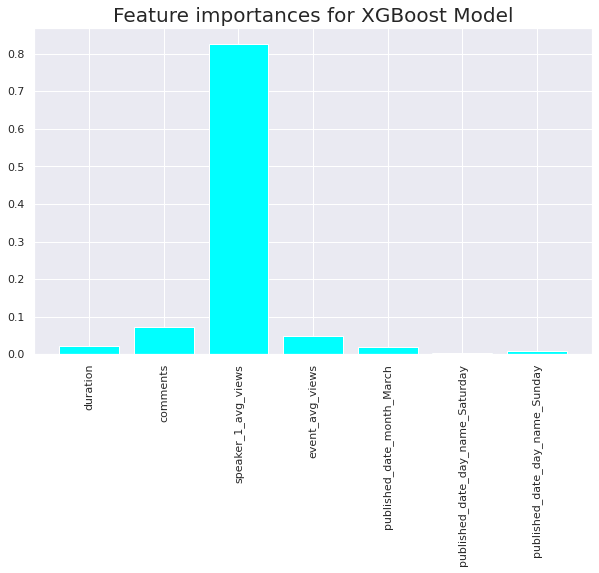

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(x=xgb_features, height=xgb_importances, color='aqua')
plt.title('Feature importances for XGBoost Model', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ml_models = [{'Model Name': 'Linear Regression',
                 'Train MAE': LR_Train_MAE, 'Test MAE': LR_Test_MAE,
                 'Train MSE': LR_Train_MSE, 'Test MSE ': LR_Test_MSE,
                 'Train RMSE': LR_Train_RMSE, 'Test RMSE': LR_Test_MSE, 
                 'Train R2': LR_Train_R2, 'Test R2': LR_Test_R2,
                 'Adjusted R2': LR_Adjusted_R2},
            {'Model Name': 'Lasso Regularization',
                 'Train MAE': LA_Train_MAE, 'Test MAE': LA_Test_MAE,
                 'Train MSE': LA_Train_MSE, 'Test MSE ': LA_Test_MSE,
                 'Train RMSE': LA_Train_RMSE, 'Test RMSE': LA_Test_MSE, 
                 'Train R2': LA_Train_R2, 'Test R2': LA_Test_R2,
                 'Adjusted R2': LA_Adjusted_R2},
            {'Model Name': 'Ridge Regularization',
                 'Train MAE': RR_Train_MAE, 'Test MAE': RR_Test_MAE,
                 'Train MSE': RR_Train_MSE, 'Test MSE ': RR_Test_MSE,
                 'Train RMSE': RR_Train_RMSE, 'Test RMSE': RR_Test_MSE, 
                 'Train R2': RR_Train_R2, 'Test R2': RR_Test_R2,
                 'Adjusted R2': RR_Adjusted_R2},
            {'Model Name': 'Elastic Net Regularization',
                 'Train MAE': ER_Train_MAE, 'Test MAE': ER_Test_MAE,
                 'Train MSE': ER_Train_MSE, 'Test MSE ': ER_Test_MSE,
                 'Train RMSE': ER_Train_RMSE, 'Test RMSE': ER_Test_MSE, 
                 'Train R2': ER_Train_R2, 'Test R2': ER_Test_R2,
                 'Adjusted R2': ER_Adjusted_R2},
            {'Model Name': 'Decision Tree Regression',
                 'Train MAE': DTR_Train_MAE, 'Test MAE': DTR_Test_MAE,
                 'Train MSE': DTR_Train_MSE, 'Test MSE ': DTR_Test_MSE,
                 'Train RMSE': DTR_Train_RMSE, 'Test RMSE': DTR_Test_MSE, 
                 'Train R2': DTR_Train_R2, 'Test R2': DTR_Test_R2,
                 'Adjusted R2': DTR_Adjusted_R2},
            {'Model Name': 'Random Forest Regression',
                 'Train MAE': RFR_Train_MAE, 'Test MAE': RFR_Test_MAE,
                 'Train MSE': RFR_Train_MSE, 'Test MSE ': RFR_Test_MSE,
                 'Train RMSE': RFR_Train_RMSE, 'Test RMSE': RFR_Test_MSE, 
                 'Train R2': RFR_Train_R2, 'Test R2': RFR_Test_R2,
                 'Adjusted R2': RFR_Adjusted_R2},
            {'Model Name': 'Ada Boost Regression',
                 'Train MAE': AB_Train_MAE, 'Test MAE': AB_Test_MAE,
                 'Train MSE': AB_Train_MSE, 'Test MSE ': AB_Test_MSE,
                 'Train RMSE': AB_Train_RMSE, 'Test RMSE': AB_Test_MSE, 
                 'Train R2': AB_Train_R2, 'Test R2': AB_Test_R2,
                 'Adjusted R2': AB_Adjusted_R2},
            {'Model Name': 'Gradient Boost Regression',
                 'Train MAE': GB_Train_MAE, 'Test MAE': GB_Test_MAE,
                 'Train MSE': GB_Train_MSE, 'Test MSE ': GB_Test_MSE,
                 'Train RMSE': GB_Train_RMSE, 'Test RMSE': GB_Test_MSE, 
                 'Train R2': GB_Train_R2, 'Test R2': GB_Test_R2,
                 'Adjusted R2': GB_Adjusted_R2},
            {'Model Name': 'XG Boost Regression',
                 'Train MAE': XG_Train_MAE, 'Test MAE': XG_Test_MAE,
                 'Train MSE': XG_Train_MSE, 'Test MSE ': XG_Test_MSE,
                 'Train RMSE': XG_Train_RMSE, 'Test RMSE': XG_Test_MSE, 
                 'Train R2': XG_Train_R2, 'Test R2': XG_Test_R2,
                 'Adjusted R2': XG_Adjusted_R2}]

In [ ]:
final_df = pd.DataFrame(ml_models)

In [ ]:
final_df

,Model Name,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2,Test R2,Adjusted R2
0,Linear Regression,269752.951045,253960.939905,2.417273e+11,2.047239e+11,491657.693079,2.047239e+11,0.801958,0.830112,0.829117
1,Lasso Regularization,269752.951045,253960.939905,2.417273e+11,2.047239e+11,491657.693079,2.047239e+11,0.801958,0.830112,0.829117
2,Ridge Regularization,269299.578018,253951.515051,2.421010e+11,2.057440e+11,492037.644205,2.057440e+11,0.801652,0.829266,0.828265
3,Elastic Net Regularization,269231.947612,253899.855298,2.421132e+11,2.057783e+11,492049.980882,2.057783e+11,0.801642,0.829238,0.828236
4,Decision Tree Regression,250880.549152,250674.397997,2.115193e+11,2.194107e+11,459912.314598,2.194107e+11,0.826707,0.817925,0.816857
5,Random Forest Regression,168247.970303,176522.680720,1.764704e+11,1.969081e+11,420083.851211,1.969081e+11,0.855422,0.836598,0.835640
6,Ada Boost Regression,284877.954497,284347.946311,2.342588e+11,2.400028e+11,484002.878442,2.400028e+11,0.808077,0.800837,0.799669
7,Gradient Boost Regression,206282.513396,210095.722496,1.719437e+11,1.831700e+11,414660.912490,1.831700e+11,0.859130,0.847999,0.847108
8,XG Boost Regression,196696.660397,210059.153406,1.569303e+11,1.832930e+11,396144.294845,1.832930e+11,0.871430,0.847897,0.847005


### From all of the models we can clearly see that Gradient Boost and XG Boost are performing better than other. In these two Gradient Boost has a bit lesser RMSE, MSE and higher R2 and Adjusted R2 values. So, Gradient Boost is the best model for this problem statement.